In [1]:
import inspect
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import matplotlib.transforms as mtransforms
from matplotlib.patches import FancyBboxPatch

In [2]:
styles = mpatch.BoxStyle.get_styles()
ncol = 2
nrow = (len(styles) + 1) // ncol

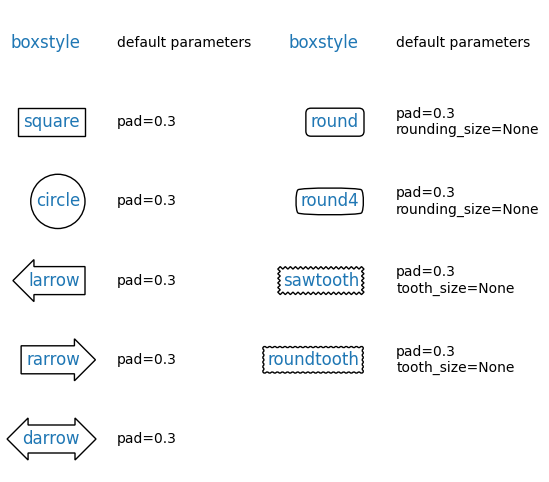

In [3]:
axs = (plt.figure(
    figsize=(3 * ncol, 1 + nrow)
).add_gridspec(1 + nrow, ncol, wspace=0.5).subplots())

for ax in axs.flat:
    ax.set_axis_off()

for ax in axs[0, :]:
    ax.text(
        0.2, 0.5, "boxstyle", transform=ax.transAxes,
        size="large", color="tab:blue", ha="right", va="center",
    )
    ax.text(
        0.4, 0.5, "default parameters",
        transform=ax.transAxes, ha="left", va="center",
    )

for ax, (stylename, stylecls) in zip(axs[1:, :].T.flat, styles.items()):
    ax.text(
        0.2, 0.5, stylename, bbox={"boxstyle": stylename, "fc": "w", "ec": "k"},
        transform=ax.transAxes, size="large", color="tab:blue", ha="right", va="center",
    )
    ax.text(
        0.4, 0.5, str(inspect.signature(stylecls))[1:-1].replace(", ", "\n"),
        transform=ax.transAxes, ha="left", va="center",
    )

plt.show()

In [4]:
def add_fancy_patch_around(ax, bb, **kwargs):
    fancy = FancyBboxPatch(
        bb.p0, bb.width, bb.height, fc=(1, 0.8, 1, 0.5),
        ec=(1, 0.5, 1, 0.5), **kwargs,
    )
    ax.add_patch(fancy)
    return fancy

In [5]:
def draw_control_points_for_patches(ax):
    for patch in ax.patches:
        patch.axes.plot(*patch.get_path().vertices.T, ".", c=patch.get_edgecolor())

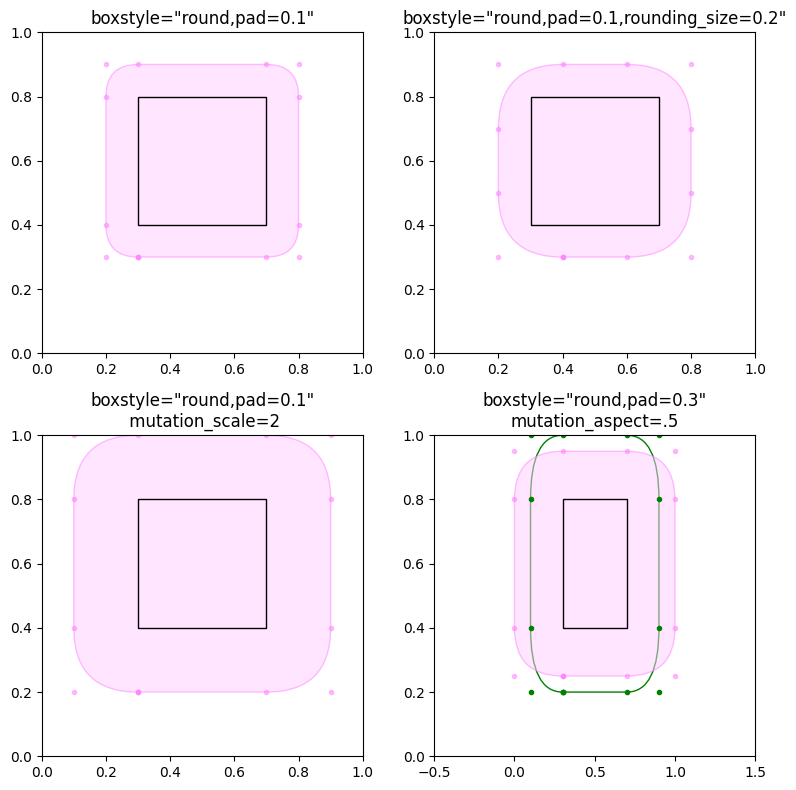

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Bbox object around which the fancy box will be drawn
bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.8]])

ax = axs[0, 0]
# a fancy box with round corners. pad=0.1
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1, title='boxstyle="round,pad=0.1"')

ax = axs[0, 1]
# bbox=round has two optional arguments: pad and rounding_size.
# They can be set during the initialization.
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
# The boxstyle and its argument can be later modified with set_boxstyle().
# Note that the old attributes are simply forgotten even if the boxstyle name is same.
fancy.set_boxstyle("round,pad=0.1,rounding_size=0.2")
ax.set(
    xlim=(0, 1), ylim=(0, 1), aspect=1,
    title='boxstyle="round,pad=0.1,rounding_size=0.2"',
)

ax = axs[1, 0]
# mutation_scale determines the overall scale of the mutation, i.e. both pad
# and rounding_size is scaled according to this value.
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1", mutation_scale=2)
ax.set(
    xlim=(0, 1), ylim=(0, 1), aspect=1,
    title='boxstyle="round,pad=0.1"\n mutation_scale=2',
)

ax = axs[1, 1]
# When the aspect ratio of the axes is not 1,
# the fancy box may not be what you expected (green).
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.2")
fancy.set(facecolor="none", edgecolor="green")
# You can compensate this by setting the mutation_aspect (pink)
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.3", mutation_aspect=0.5)
ax.set(
    xlim=(-.5, 1.5), ylim=(0, 1), aspect=2,
    title='boxstyle="round,pad=0.3"\nmutation_aspect=.5',
)

for ax in axs.flat:
    draw_control_points_for_patches(ax)
    # Draw the original bbox (using boxstyle=square with pad=0).
    fancy = add_fancy_patch_around(ax, bb, boxstyle="square,pad=0")
    fancy.set(edgecolor="black", facecolor="none", zorder=10)

fig.tight_layout()
plt.show()